# Income 

In [9]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [10]:
# load data
income = pd.read_excel('../data/landing/Table 2 - Total income distribution by geography, 2020-21.xlsx', sheet_name='Table 2.4', header=5)

In [11]:
# check data
income.head(5)

,Unnamed: 0,Unnamed: 1,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
0,SA2,SA2 NAME,(persons),years,$,$,$,ratio,ratio,ratio,ratio,coef.,%,%,%,%,%,%,%
1,Australia,NaN,"14,760,008",42,"1,040,901,408,310","54,890","70,522",5,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25,25,25,25
2,New South Wales,NaN,"4,603,736",42,"341,107,484,589","55,854","74,094",5,1.9,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
3,101021007,Braidwood,"2,467",51,"169,986,703","46,640","68,904",6.84,2.05,0.3,0.07,0.615,21.2,32.6,42.7,31.8,24.3,21.7,22.2
4,101021008,Karabar,"5,103",42,"355,538,349","65,564","69,672",3.37,1.57,0.47,0.23,0.365,4.4,14.5,24.1,17.8,22.6,32.9,26.7


In [12]:
# select rows with NaN values
nan_rows = income[income.isnull().any(axis=1)]
nan_rows

,Unnamed: 0,Unnamed: 1,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
1,Australia,NaN,"14,760,008",42,"1,040,901,408,310","54,890","70,522",5,1.88,0.38,0.14,0.483,9.8,22.5,33.4,25,25,25,25
2,New South Wales,NaN,"4,603,736",42,"341,107,484,589","55,854","74,094",5,1.9,0.38,0.15,0.497,11.2,24.3,35.2,24.6,24.6,24.7,26.1
645,Victoria,NaN,"3,785,505",41,"263,825,637,886","54,008","69,694",4.96,1.88,0.38,0.15,0.483,9.8,22.5,33.5,25.3,25.4,24.9,24.3
1168,Queensland,NaN,"2,973,998",42,"198,422,040,159","53,643","66,719",4.84,1.85,0.38,0.15,0.467,8.4,20.6,31.6,25,26.1,25.4,23.4
1715,South Australia,NaN,"1,009,121",43,"64,181,556,748","52,767","63,601",4.54,1.77,0.39,0.15,0.454,8,20.1,30.7,25.1,26.9,27.1,20.9
1890,Western Australia,NaN,"1,585,093",42,"120,273,967,595","58,591","75,878",5.19,1.93,0.37,0.15,0.482,9.5,21.9,32.9,23.9,23.2,23.8,29.1
2156,Tasmania,NaN,"312,904",44,"18,621,588,011","50,130","59,512",4.69,1.77,0.38,0.14,0.451,7.5,19.5,30.1,26.6,28.1,26.6,18.6
2256,Northern Territory,NaN,"126,071",39,"9,391,280,690","65,906","74,492",3.91,1.67,0.43,0.2,0.406,6,16.9,27.1,19,21.6,29.4,29.9
2325,Australian Capital Territory,NaN,"290,512",40,"24,113,287,925","71,093","83,003",3.85,1.66,0.43,0.21,0.419,6.9,18.6,28.9,17.4,20.4,27.1,35.1
2460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# select all rows between 645 and 1168
income = income.iloc[646:1168] 

In [14]:
# rename columns Unnamed: 0 to SA2 code, and Unnamed: 1 to SA2 name
income.rename(columns={'Unnamed: 0': 'SA2 code', 'Unnamed: 1': 'SA2 name'}, inplace=True)

In [15]:
# filter data to only include rows with SA2 code that starts with 206, 207, 208, 209, 210, 211, 212, 213, 214 (Melbourne SA2)
income = income[income['SA2 code'].astype(str).str.startswith(('206', '207', '208', '209', '210', '211', '212', '213', '214'))]

In [16]:
# check data
income.head(5)

,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
757,206011106,Brunswick East,"8,921",34,"703,845,159","67,960","78,898",4.21,1.71,0.41,0.2,0.418,6,17.4,28,19.3,21,25.9,33.8
758,206011107,Brunswick West,"9,353",36,"686,471,144","60,171","73,396",4.6,1.83,0.4,0.18,0.445,6.7,19,29.9,22.1,23.9,25.3,28.7
759,206011109,Pascoe Vale South,"6,331",43,"489,833,696","63,813","77,371",4.57,1.85,0.4,0.18,0.439,5.9,17.9,29,20.6,23.1,24.6,31.7
760,206011495,Brunswick - North,"8,740",35,"661,294,326","61,510","75,663",4.59,1.84,0.4,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
761,206011496,Brunswick - South,"9,323",34,"731,086,364","66,877","78,418",4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


In [17]:
# check null values
income.isnull().sum()

SA2 code                 0
SA2 name                 0
Earners                  0
Median age of earners    0
Sum                      0
Median                   0
Mean                     0
P80/P20                  0
P80/P50                  0
P20/P50                  0
P10/P50                  0
Gini coefficient         0
Top 1%                   0
Top 5%                   0
Top 10%                  0
Lowest Quartile          0
Second Quartile          0
Third Quartile           0
Highest Quartile         0
dtype: int64

In [18]:
# check for essendon airport
income[income['SA2 name'].str.contains('Essendon Airport')] 


,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
907,210011227,Essendon Airport,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np,np


In [19]:
# drop row 907 for Essendon Airport
income = income.drop([907])

In [20]:
# Convert relevant columns to numeric types (float or int) as appropriate
columns_to_convert = [
    'P80/P20', 'P80/P50', 'P20/P50', 'P10/P50', 
    'Gini coefficient', 'Top 1%', 'Top 5%', 'Top 10%', 
    'Lowest Quartile', 'Second Quartile', 'Third Quartile', 'Highest Quartile'
]

# Convert the columns to numeric, using 'coerce' to convert invalid values to NaN
income[columns_to_convert] = income[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verify the new datatypes
print(income.dtypes)

SA2 code                  object
SA2 name                  object
Earners                   object
Median age of earners     object
Sum                       object
Median                    object
Mean                      object
P80/P20                  float64
P80/P50                  float64
P20/P50                  float64
P10/P50                  float64
Gini coefficient         float64
Top 1%                   float64
Top 5%                   float64
Top 10%                  float64
Lowest Quartile          float64
Second Quartile          float64
Third Quartile           float64
Highest Quartile         float64
dtype: object


In [21]:
# Remove commas from the columns and convert to numeric (float) first
columns_to_convert = ['Earners', 'Mean', 'Median', 'Sum', 'Median age of earners']

# Remove commas and convert to numeric
income[columns_to_convert] = income[columns_to_convert].replace({',': ''}, regex=True)

# Convert to integers after cleaning
income[columns_to_convert] = income[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='integer')

# Verify the new datatypes
print(income.dtypes)

SA2 code                  object
SA2 name                  object
Earners                    int16
Median age of earners       int8
Sum                        int64
Median                     int32
Mean                       int32
P80/P20                  float64
P80/P50                  float64
P20/P50                  float64
P10/P50                  float64
Gini coefficient         float64
Top 1%                   float64
Top 5%                   float64
Top 10%                  float64
Lowest Quartile          float64
Second Quartile          float64
Third Quartile           float64
Highest Quartile         float64
dtype: object


In [22]:
# Check if any value in the DataFrame is equal to 'np'
np_values = income[income == 'np'].dropna(how='all')

# Display the rows where 'np' is found
print(np_values)

Empty DataFrame
Columns: [SA2 code, SA2 name, Earners, Median age of earners, Sum, Median, Mean, P80/P20, P80/P50, P20/P50, P10/P50, Gini coefficient, Top 1%, Top 5%, Top 10%, Lowest Quartile, Second Quartile, Third Quartile, Highest Quartile]
Index: []


In [23]:
# check first 5 rows
income.head(5)

,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
757,206011106,Brunswick East,8921,34,703845159,67960,78898,4.21,1.71,0.41,0.20,0.418,6.0,17.4,28.0,19.3,21.0,25.9,33.8
758,206011107,Brunswick West,9353,36,686471144,60171,73396,4.60,1.83,0.40,0.18,0.445,6.7,19.0,29.9,22.1,23.9,25.3,28.7
759,206011109,Pascoe Vale South,6331,43,489833696,63813,77371,4.57,1.85,0.40,0.18,0.439,5.9,17.9,29.0,20.6,23.1,24.6,31.7
760,206011495,Brunswick - North,8740,35,661294326,61510,75663,4.59,1.84,0.40,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
761,206011496,Brunswick - South,9323,34,731086364,66877,78418,4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


In [24]:
income.to_parquet('../data/raw/income_cleaned.parquet')

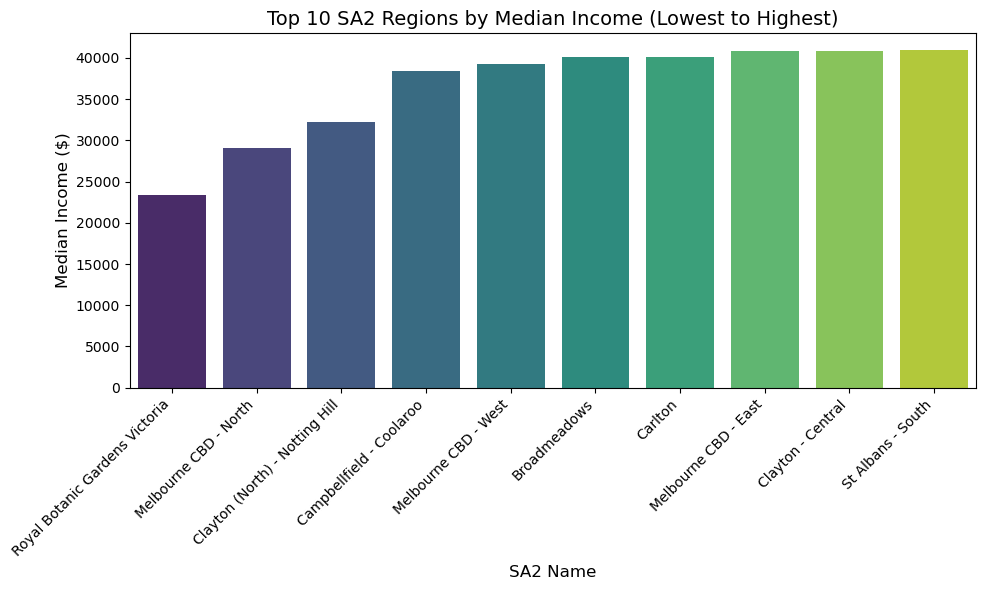

In [25]:
# Sort the data by 'Median' income in ascending order and select the top 10 SA2 regions
top_10_median = income.sort_values(by='Median', ascending=True).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='SA2 name', y='Median', data=top_10_median, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 SA2 Regions by Median Income (Lowest to Highest)', fontsize=14)
plt.xlabel('SA2 Name', fontsize=12)
plt.ylabel('Median Income ($)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

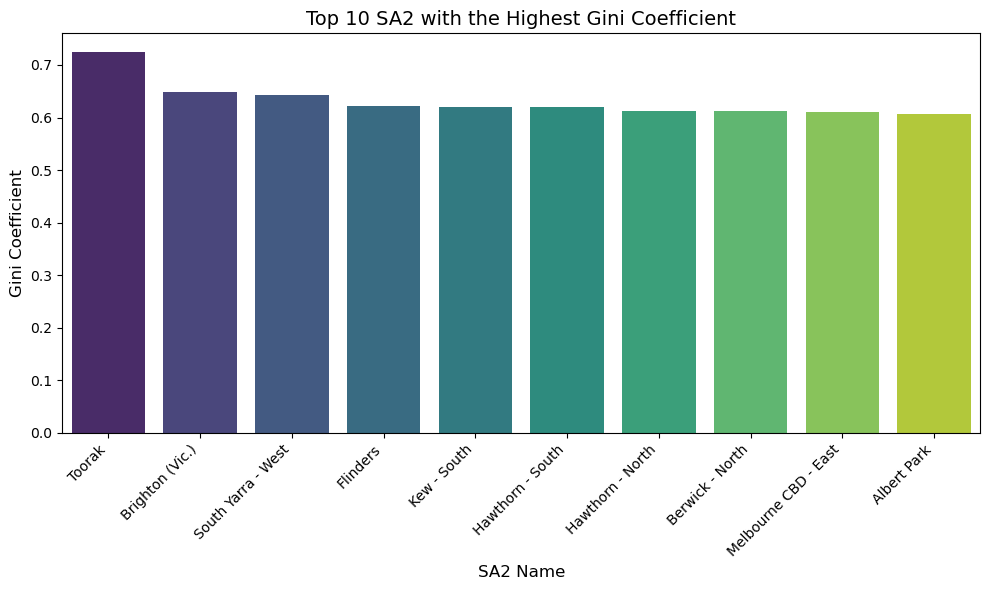

In [26]:
# Convert 'Gini coefficient' column to numeric (float)
income['Gini coefficient'] = pd.to_numeric(income['Gini coefficient'], errors='coerce')

# Sort the data by 'Gini coefficient' and select the top 10 SA2 regions
top_10_gini = income.sort_values(by='Gini coefficient', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='SA2 name', y='Gini coefficient', data=top_10_gini, palette='viridis')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 SA2 with the Highest Gini Coefficient', fontsize=14)
plt.xlabel('SA2 Name', fontsize=12)
plt.ylabel('Gini Coefficient', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


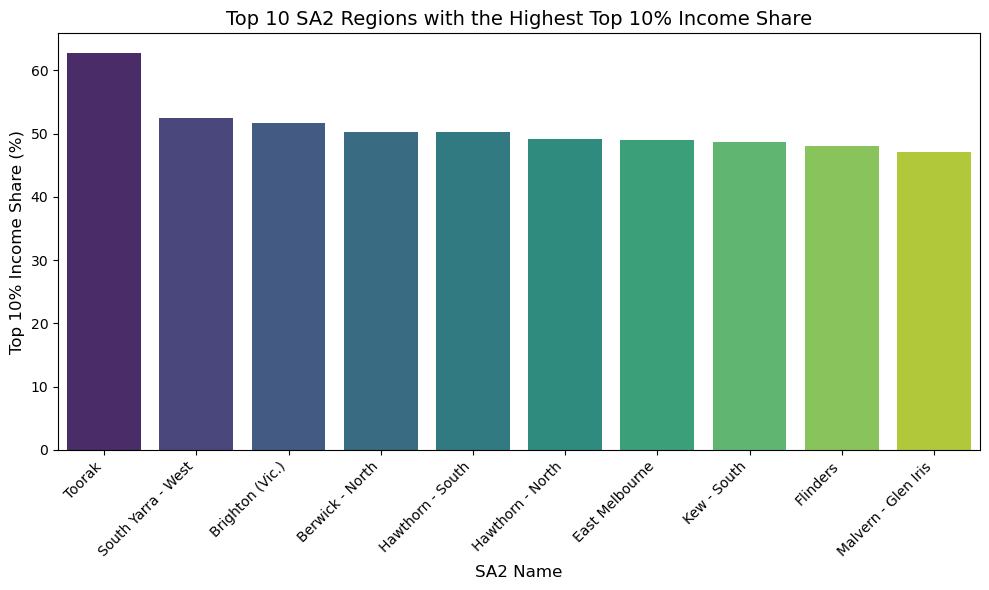

In [27]:
# Sort the data by 'Top 10%' income share and select the top 10 SA2 regions
top_10_top_10 = income.sort_values(by='Top 10%', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='SA2 name', y='Top 10%', data=top_10_top_10, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 SA2 Regions with the Highest Top 10% Income Share', fontsize=14)
plt.xlabel('SA2 Name', fontsize=12)
plt.ylabel('Top 10% Income Share (%)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


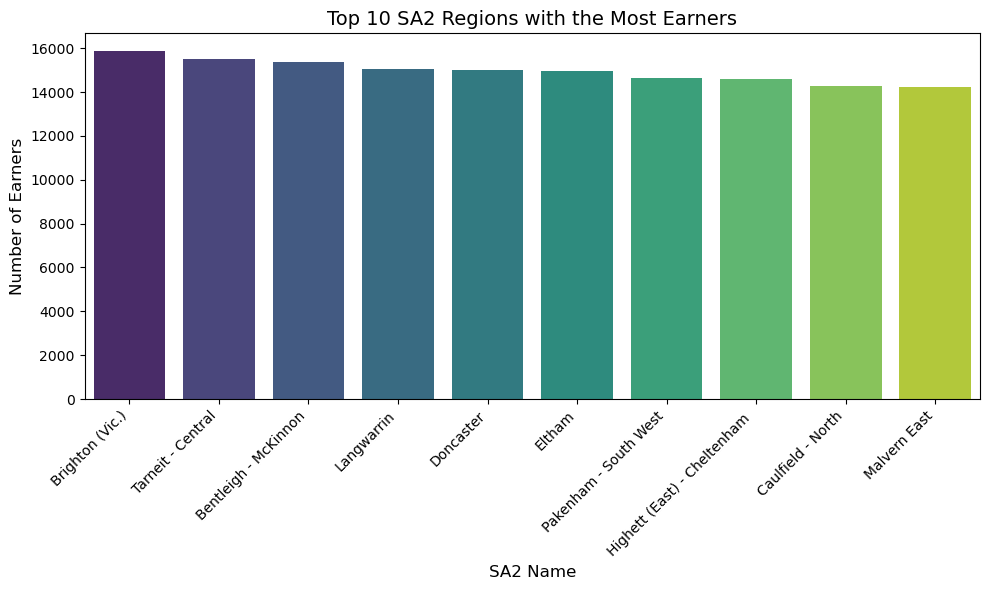

In [28]:
# Sort the data by 'Earners' in descending order and select the top 10 SA2 regions
top_10_earners = income.sort_values(by='Earners', ascending=False).head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='SA2 name', y='Earners', data=top_10_earners, palette='viridis')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.title('Top 10 SA2 Regions with the Most Earners', fontsize=14)
plt.xlabel('SA2 Name', fontsize=12)
plt.ylabel('Number of Earners', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Check correlation

In [39]:
# import the parquet file
house = pd.read_csv('../data/curated/domain_data.csv')

In [40]:
# check data
house.head(5)

,Unnamed: 0,url,price,address,property_type,latitude,longitude,Beds,Baths,Parking,...,sa4_name,gcc_code,gcc_name,ste_code,ste_name,aus_code,aus_name,areasqkm,loci_uri,geometry_proj
0,0,https://www.domain.com.au/10-allara-court-donv...,"$1,400.00","10 Allara Court, Donvale VIC 3111",Townhouse,-37.774273,145.181126,4.0,3.0,2.0,...,Melbourne - Outer East,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,20.8028,http://linked.data.gov.au/dataset/asgsed3/SA2/...,POINT (989259.4173701586 -4291898.086618988)
1,1,https://www.domain.com.au/7-pine-ridge-donvale...,$750 per week,"7 Pine Ridge, Donvale VIC 3111",House,-37.791251,145.175649,4.0,2.0,0.0,...,Melbourne - Outer East,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,20.8028,http://linked.data.gov.au/dataset/asgsed3/SA2/...,POINT (988607.8235432974 -4293742.529802319)
2,2,https://www.domain.com.au/20-mulsanne-way-donv...,$1300 per week,"20 Mulsanne Way, Donvale VIC 3111",House,-37.797232,145.181264,5.0,2.0,2.0,...,Melbourne - Outer East,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,20.8028,http://linked.data.gov.au/dataset/asgsed3/SA2/...,POINT (989043.8745826276 -4294451.6663155295)
3,3,https://www.domain.com.au/3-monterey-crescent-...,$825pw / $3585pcm,"3 Monterey Crescent, Donvale VIC 3111",House,-37.792402,145.174323,3.0,1.0,5.0,...,Melbourne - Outer East,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,20.8028,http://linked.data.gov.au/dataset/asgsed3/SA2/...,POINT (988479.4635717812 -4293860.034681493)
4,4,https://www.domain.com.au/3-49-leslie-street-d...,$680.00,"3/49 Leslie Street, Donvale VIC 3111",Townhouse,-37.781012,145.180705,3.0,2.0,2.0,...,Melbourne - Outer East,2GMEL,Greater Melbourne,2,Victoria,AUS,Australia,20.8028,http://linked.data.gov.au/dataset/asgsed3/SA2/...,POINT (989155.4581678715 -4292643.925981721)


In [41]:
# check for feature names
house.columns

Index(['Unnamed: 0', 'url', 'price', 'address', 'property_type', 'latitude',
       'longitude', 'Beds', 'Baths', 'Parking', 'bond', 'extracted_price',
       'geometry', 'index_right', 'sa2_code', 'sa2_name', 'chg_flag',
       'chg_lbl', 'sa3_code', 'sa3_name', 'sa4_code', 'sa4_name', 'gcc_code',
       'gcc_name', 'ste_code', 'ste_name', 'aus_code', 'aus_name', 'areasqkm',
       'loci_uri', 'geometry_proj'],
      dtype='object')

In [42]:
# check income data
income.head(5)

,SA2 code,SA2 name,Earners,Median age of earners,Sum,Median,Mean,P80/P20,P80/P50,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
757,206011106,Brunswick East,8921,34,703845159,67960,78898,4.21,1.71,0.41,0.20,0.418,6.0,17.4,28.0,19.3,21.0,25.9,33.8
758,206011107,Brunswick West,9353,36,686471144,60171,73396,4.60,1.83,0.40,0.18,0.445,6.7,19.0,29.9,22.1,23.9,25.3,28.7
759,206011109,Pascoe Vale South,6331,43,489833696,63813,77371,4.57,1.85,0.40,0.18,0.439,5.9,17.9,29.0,20.6,23.1,24.6,31.7
760,206011495,Brunswick - North,8740,35,661294326,61510,75663,4.59,1.84,0.40,0.19,0.445,6.9,18.9,29.8,21.5,23.2,24.7,30.5
761,206011496,Brunswick - South,9323,34,731086364,66877,78418,4.39,1.73,0.39,0.18,0.438,6.8,18.5,29.2,20.1,21.4,25.5,33.1


In [43]:
# merge the two dataframes on SA2 name and sa2_code 
merged = pd.merge(house, income, left_on='sa2_name', right_on='SA2 name', how='inner')

In [44]:
# check data
merged.head(5)

,Unnamed: 0,url,price,address,property_type,latitude,longitude,Beds,Baths,Parking,...,P20/P50,P10/P50,Gini coefficient,Top 1%,Top 5%,Top 10%,Lowest Quartile,Second Quartile,Third Quartile,Highest Quartile
0,0,https://www.domain.com.au/10-allara-court-donv...,"$1,400.00","10 Allara Court, Donvale VIC 3111",Townhouse,-37.774273,145.181126,4.0,3.0,2.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
1,1,https://www.domain.com.au/7-pine-ridge-donvale...,$750 per week,"7 Pine Ridge, Donvale VIC 3111",House,-37.791251,145.175649,4.0,2.0,0.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
2,2,https://www.domain.com.au/20-mulsanne-way-donv...,$1300 per week,"20 Mulsanne Way, Donvale VIC 3111",House,-37.797232,145.181264,5.0,2.0,2.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
3,3,https://www.domain.com.au/3-monterey-crescent-...,$825pw / $3585pcm,"3 Monterey Crescent, Donvale VIC 3111",House,-37.792402,145.174323,3.0,1.0,5.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4
4,4,https://www.domain.com.au/3-49-leslie-street-d...,$680.00,"3/49 Leslie Street, Donvale VIC 3111",Townhouse,-37.781012,145.180705,3.0,2.0,2.0,...,0.32,0.11,0.555,13.1,27.9,39.7,28.5,22.1,19.0,30.4


In [45]:
# cehck columns
merged.columns

Index(['Unnamed: 0', 'url', 'price', 'address', 'property_type', 'latitude',
       'longitude', 'Beds', 'Baths', 'Parking', 'bond', 'extracted_price',
       'geometry', 'index_right', 'sa2_code', 'sa2_name', 'chg_flag',
       'chg_lbl', 'sa3_code', 'sa3_name', 'sa4_code', 'sa4_name', 'gcc_code',
       'gcc_name', 'ste_code', 'ste_name', 'aus_code', 'aus_name', 'areasqkm',
       'loci_uri', 'geometry_proj', 'SA2 code', 'SA2 name', 'Earners',
       'Median age of earners', 'Sum', 'Median', 'Mean', 'P80/P20', 'P80/P50',
       'P20/P50', 'P10/P50', 'Gini coefficient', 'Top 1%', 'Top 5%', 'Top 10%',
       'Lowest Quartile', 'Second Quartile', 'Third Quartile',
       'Highest Quartile'],
      dtype='object')

In [46]:
# Select the relevant columns
cols_of_interest = ['Earners', 'Median age of earners', 'Sum', 'Median', 'Mean',
                    'P80/P20', 'P80/P50', 'P20/P50', 'P10/P50', 'Gini coefficient',
                    'Top 1%', 'Top 5%', 'Top 10%', 'Lowest Quartile', 'Second Quartile',
                    'Third Quartile', 'Highest Quartile', 'extracted_price']

# Create a DataFrame with only the selected columns
df_selected = merged[cols_of_interest]

# Convert columns to numeric if necessary (ignore errors)
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

In [47]:
# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Get only the correlations related to 'extracted_price'
extracted_price_corr = corr_matrix['extracted_price']


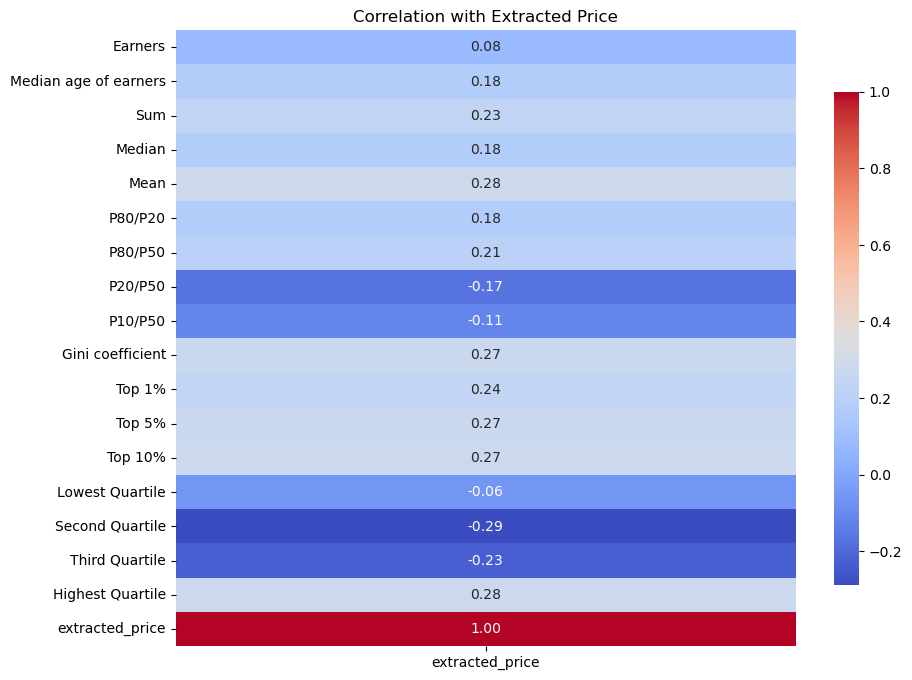

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap only for extracted_price correlations
sns.heatmap(extracted_price_corr.to_frame(), annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .8})

# Set title
plt.title('Correlation with Extracted Price')

# Show plot
plt.show()
